#### Imports

In [12]:
## importar as bibliotecas básicas

import numpy as np
import pandas as pd
import random

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
    
## plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')

### Abertura da Base de Dados

In [3]:
df = pd.read_csv('atpchina.csv', sep=',')

# **Data Understanding**

No primeiro notebook, criou-se um novo csv (atpchina) com todos os jogos jogados na China.

Neste subcapítulo, vamos ver todas as variáveis existentes e verificar que tipo de erros podem existir (sejam nulos ou valores que não fazem sentido, outliers, etc), para depois no Data Preparation estarmos preparados para lidar com esses valores.

### Informaçãoes sobre a base de dados

In [29]:
df.head(6)

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Location
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2019.10.07 - 2019.10.13,Hard,"$7,473,620",Round of 64,NaN,bye,NaN,NaN,China
1,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2019.10.07 - 2019.10.13,Hard,"$7,473,620",Quarter-Finals,7,Stefanos Tsitsipas,L,63 57 36,China
2,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2019.10.07 - 2019.10.13,Hard,"$7,473,620",Round of 32,36,Denis Shapovalov,W,63 63,China
3,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2019.10.07 - 2019.10.13,Hard,"$7,473,620",Round of 16,17,John Isner,W,75 63,China
4,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2018.10.08 - 2018.10.14,Hard,"$7,086,700",Finals,19,Borna Coric,W,63 64,China
5,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2018.10.08 - 2018.10.14,Hard,"$7,086,700",Quarter-Finals,8,Kevin Anderson,W,"76, 63",China


In [30]:
df.shape

(26357, 15)

In [5]:
df.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Tournament',
       'Date', 'Ground', 'Prize', 'GameRound', 'GameRank', 'Oponent', 'WL',
       'Score', 'Location'],
      dtype='object')

In [6]:
print(df.dtypes)

PlayerName     object
Born           object
Height        float64
Hand           object
LinkPlayer     object
Tournament     object
Date           object
Ground         object
Prize          object
GameRound      object
GameRank       object
Oponent        object
WL             object
Score          object
Location       object
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26357 entries, 0 to 26356
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PlayerName  26357 non-null  object 
 1   Born        21043 non-null  object 
 2   Height      21016 non-null  float64
 3   Hand        23475 non-null  object 
 4   LinkPlayer  26357 non-null  object 
 5   Tournament  26357 non-null  object 
 6   Date        26357 non-null  object 
 7   Ground      26357 non-null  object 
 8   Prize       25872 non-null  object 
 9   GameRound   26357 non-null  object 
 10  GameRank    25707 non-null  object 
 11  Oponent     26357 non-null  object 
 12  WL          25707 non-null  object 
 13  Score       25705 non-null  object 
 14  Location    26357 non-null  object 
dtypes: float64(1), object(14)
memory usage: 3.0+ MB


In [8]:
df.describe()

,Height
count,21016.000000
mean,182.650742
std,12.181615
min,0.000000
25%,178.000000
50%,183.000000
75%,188.000000
max,211.000000


Nota: Já é percetível que aquele outlier não existe nesta nova base de dados. Mas teremos que verificar o jogador com 211 cm.

### Valores Omissos

Em baixo vamos verificar o número de omissos para cada variável.

In [4]:
nan_count2 = df.isna().sum()
print(nan_count2)

PlayerName       0
Born          5314
Height        5341
Hand          2882
LinkPlayer       0
Tournament       0
Date             0
Ground           0
Prize          485
GameRound        0
GameRank       650
Oponent          0
WL             650
Score          652
Location         0
dtype: int64


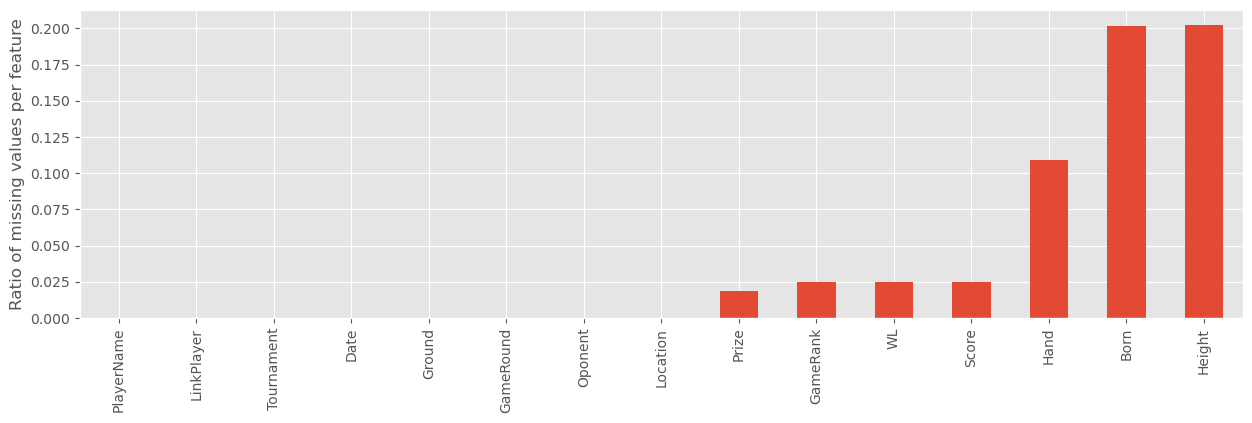

In [15]:
df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4),
title="",ylabel="Ratio of missing values per feature");

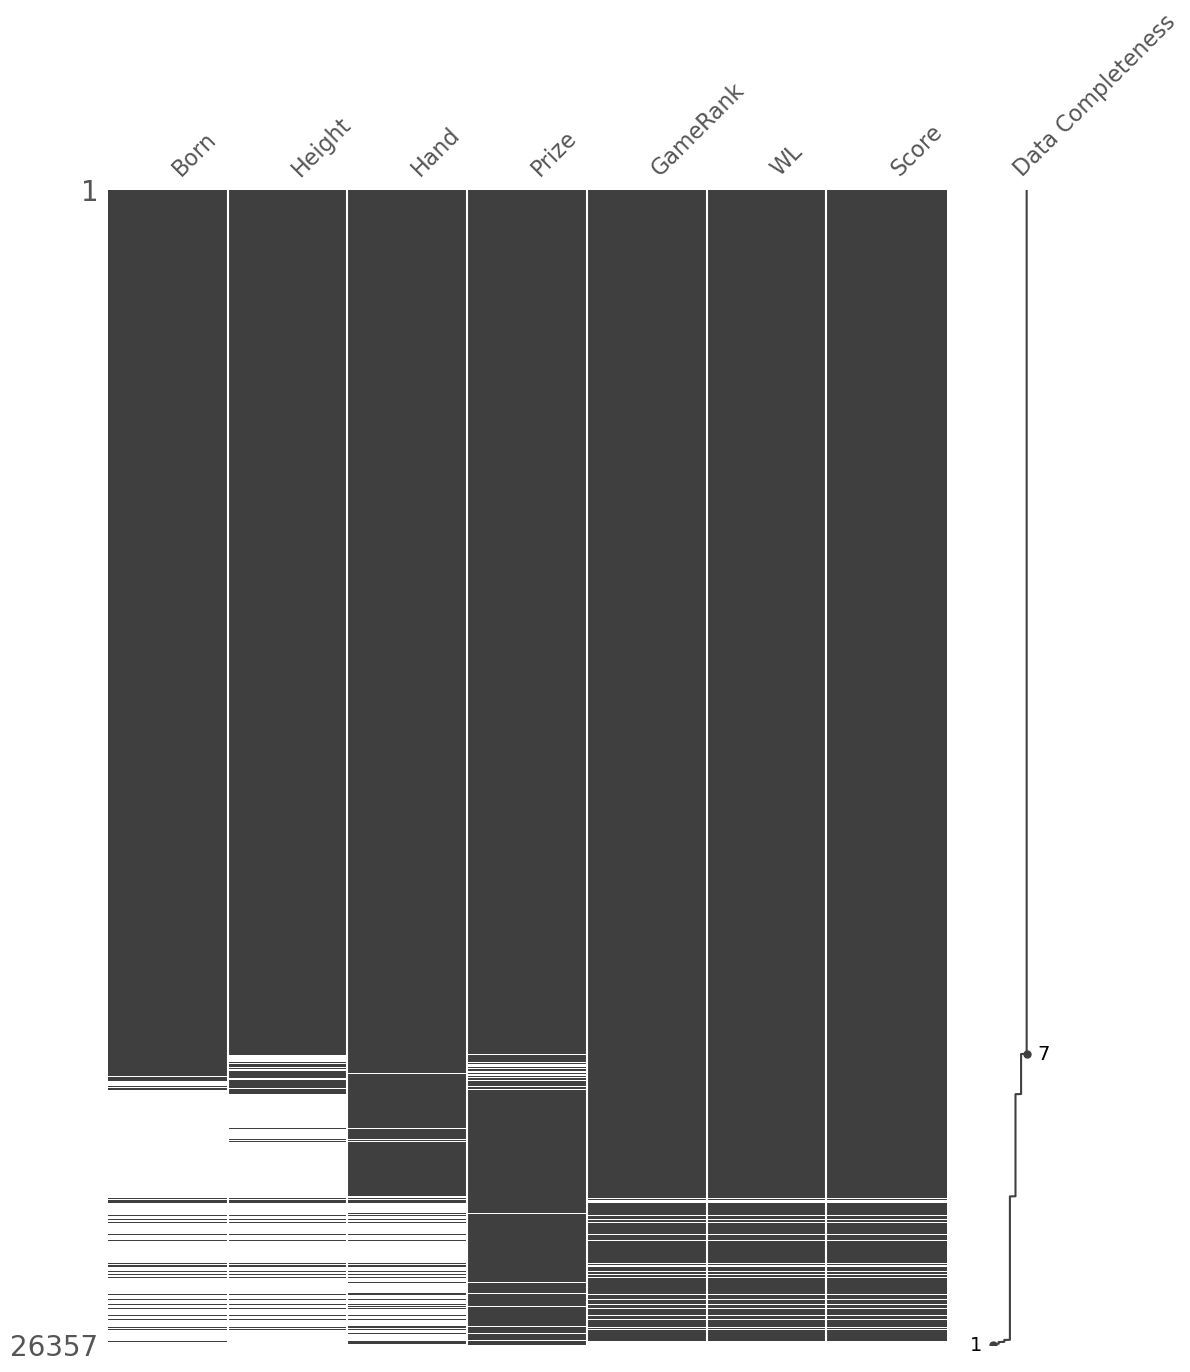

In [25]:
df_nulls = df[['Born', 'Height', 'Hand', 'Prize', 'GameRank', 'WL', 'Score']]

msno.matrix(df_nulls, labels=True, sort="descending", figsize=(12, 15));

plt.savefig('missing_values_matrix.png')

Como a variável target é a Score (não é bem essa variável, vai ser sim, uma variável nova que vai ser construída a partir da score), não poderão existir valores nulos nesta variável. 

Portanto, estas 652 observações da variável Score deverão ser apagadas.

Em relação às variáveis GameRank, WL e Score a sensação que dá, é que se apagarmos as 652 observações associadas aos omissos, nas restantes duas variáveis mencionadas, também deverão ficar sem omissos. 

Então, o próximo código que deveremos realizar terá que nos dar a possibilidade de verificar em que observações existem NA's.

De resto, podemos concluir, que nas colunas PlayerName, LinkPlayer, Tournament, Date, Ground, GameRound, Oponent e Location não existem omissos.

##### Verifcação de alguns omissos

In [14]:
num_rows_with_na_in_both = df[['WL', 'Score', 'GameRank']].isna().all(axis=1).sum()

print(num_rows_with_na_in_both)

650


Como é possível concluir acima, nas 650 observações onde existem omissos de GameRank e WL também existem NA's em Score. 

Portanto, quando formos apagar essas 652 observações de omissos da variável score, os 650 omissos de GameRank e WL também serão apagados.

### Valores únicos

Será importante perceber os valores únicos existentes dentro da nossa base de dados.

Quantidade de valores únicos na base de dados:

Location         1
WL               2
Ground           3
Hand             7
GameRound       11
Height          22
Prize           55
Tournament     118
Date           380
Born           851
PlayerName    1663
LinkPlayer    1663
GameRank      1849
Oponent       2013
Score         2086
dtype: int64


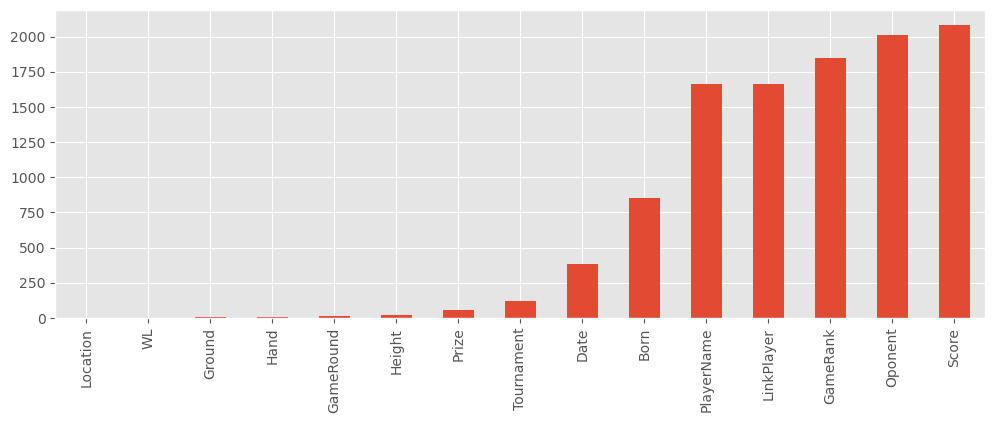

In [38]:
unique_values = df.nunique().sort_values()
print(unique_values)
unique_values.plot.bar(logy=False, figsize=(12, 4), title="");

#### PieCharts

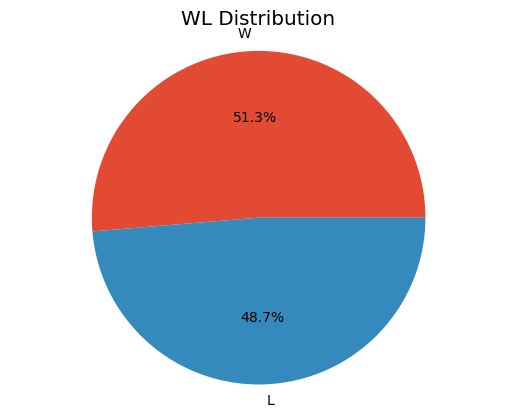

In [35]:
wl_counts = df['WL'].value_counts()

plt.pie(wl_counts, labels=wl_counts.index, autopct='%1.1f%%')
plt.title('WL Distribution')
plt.axis('equal')
plt.savefig('piechart_wl.png')
plt.show()

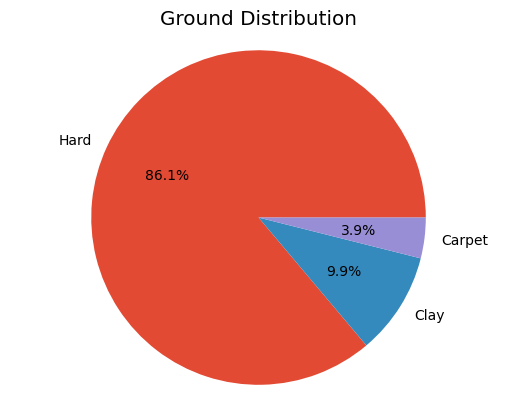

In [33]:
ground_counts = df['Ground'].value_counts()

plt.pie(ground_counts, labels=ground_counts.index, autopct='%1.1f%%')
plt.title('Ground Distribution')
plt.axis('equal')
plt.savefig('piechart_ground.png')
plt.show()

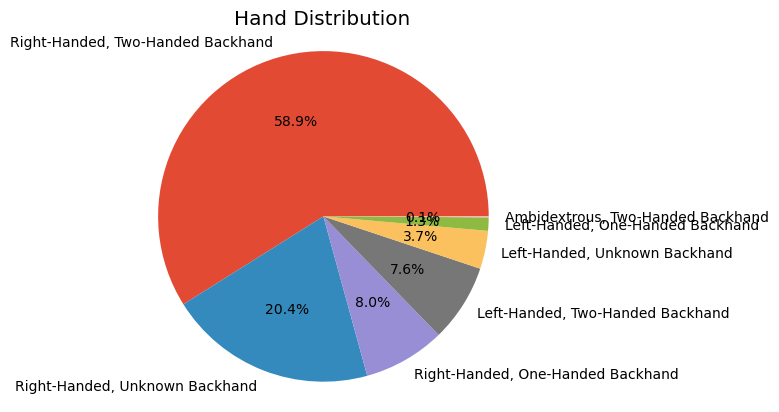

In [36]:
hand_counts = df['Hand'].value_counts()

plt.pie(hand_counts, labels=hand_counts.index, autopct='%1.1f%%')
plt.title('Hand Distribution')
plt.axis('equal')
plt.savefig('piechart_hand.png')
plt.show()

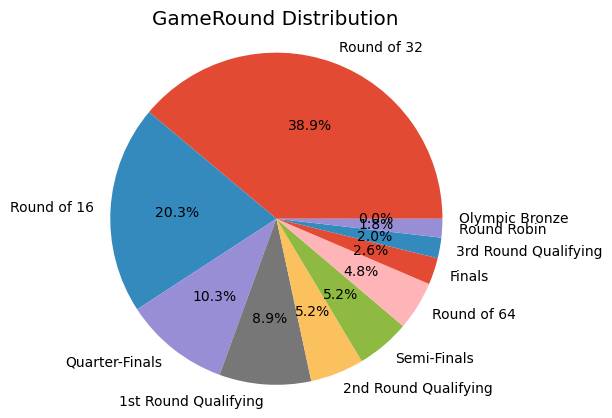

In [37]:
gameround_counts = df['GameRound'].value_counts()

plt.pie(gameround_counts, labels=gameround_counts.index, autopct='%1.1f%%')
plt.title('GameRound Distribution')
plt.axis('equal')
plt.savefig('piechart_gameround.png')
plt.show()

#### Variável Tournament

In [11]:
print(df['Tournament'].unique())

['ATP Masters 1000 Shanghai' 'Beijing' 'Tennis Masters Cup'
 'Beijing Olympics' 'Kaohsiung' 'Shanghai' 'Nanchang' 'Shenzhen' 'Zhuhai'
 'Chengdu' 'Quanzhou' 'Anning' 'Qingdao' 'Ningbo' 'Qujing' 'Shenzhen 2'
 'Suzhou' 'Guangzhou' 'Chinese Taipei F2' 'Taipei' 'China F4' 'China F3'
 'Zhangjiagang' 'Jinan' 'China F5' 'Liuzhou' 'China F9' 'China F8'
 'China F7' 'Kun-Ming' 'An-Ning' 'China F2' 'Baotou' 'China F6'
 'AOG1 CHN vs KOR Round 1' 'Hong Kong F4' 'Pingguo' 'Shanghai1'
 'Chinese Taipei F1' 'China F1' 'Nanjing'
 'CHN vs. JPN DC Qualifier 1st Round' 'Hong Kong' 'China F14' 'Wuhan'
 'Hong Kong F5' 'Chinese Taipei F3' 'CHN vs. KAZ AOG I 2nd RD'
 'TPE vs. KAZ AOG I 1st RD' 'CHN vs. IND AOG1 2nd Round'
 'TPE vs. IRN AOG2 Play-Off' 'AOG1 TPE vs. CHN 1st Round' 'Tianjin'
 'CHN v. JPN AOG1 1st Rd' 'China F11' 'China F10' 'Wuhai'
 'CHN vs. UZB AOGI 2nd Rd.' 'CHN vs. UZB AOG I 1st RD' 'China F12'
 'China F13' 'CHN vs. AUS AOG 1 2nd RD' 'M25 Taipei' 'M25 Shenzhen'
 'M25 Luan' 'M25 Wuhan' 'TPE vs. 

#### Variável Score

Na variável Score, é percetível reparar que existem algumas deformações no Score

In [12]:
(df["Score"].unique())

array(['63 57 36', '75 63', '63 63', ..., '16 64 41 (RET)', '64 16 8-10',
       '61 67 16'], dtype=object)

#### Variável Born

Nesta variável deverá ser aplicado a mesma lógica usada no último notebook para a variável Location. Usamos o Split[-1] para obter a última observação e ficamos com os países unicamente.

Muito possivelmente, existirão casos em que ficaremos apenas com as cidades dos jogadores e aí deveremos fazer a imputação da cidade para o país onde o jogador nasceu.

Mais tarde para ser possível, colocar esta variável no modelo, deverá-se juntar os países de cada continente e depois criar dummies.

In [13]:
print(df['Born'].unique())

['Belgrade, Serbia' 'Moscow, Russia' 'Manacor, Mallorca, Spain'
 'Hamburg, Germany' 'Athens, Greece' 'Rome, Italy' 'Oslo, Norway'
 'Montreal, Canada' 'Wroclaw, Poland' 'Johannesburg, South Africa'
 'Rancho Santa Fe, CA, USA' 'Tel Aviv, Israel' 'Buenos Aires, Argentina'
 'Castellon de la Plana, Spain' 'St. Joseph, MI, USA' 'Gijon, Spain'
 'Tbilisi, Georgia' 'Turin, Italy' 'Greensboro, NC, USA'
 'Medjugorje, Bosnia-Herzegovina' 'Paris, France' 'Basel, Switzerland'
 'Birmingham, England' 'Sydney, Australia' 'Haskovo, Bulgaria'
 'Santiago, Chile' 'Hyattsville, MD, USA' 'Gatchina, Russia'
 'Sanremo, Italy' 'Barcelona, Spain' 'Azul, Argentina' 'Sombor, Serbia'
 'Minsk, Belarus' 'Cape Town, South Africa' 'Alzira, Spain'
 'Avignon, France' 'Wiener Neustadt, Austria' 'Shimane, Japan'
 'Thousand Oaks, CA, USA' 'Senta, Serbia' 'Piedmont, CA, USA'
 'Nyiregyhaza, Hungary' 'Warstein, Germany' 'Sangju, South Korea'
 'Furtwangen, Germany' 'Cuenca, Spain' 'Kempen, Germany'
 'Rocourt, Belgium' 'Helsinki

#### Variável Ground

É possível concluir que na China, ainda não existiu nenhum torneio jogado em relva. 

Como não existem omissos nesta variável, o tratamento a fazer é aplicar o one hot encoder, para cada tipo de piso.

In [14]:
print(df['Ground'].unique())

['Hard' 'Clay' 'Carpet']


#### Variável Prize

In [15]:
print(df['Prize'].unique())

['$7,473,620' '$7,086,700' '$5,452,985' '$2,700,510' '$4,783,320'
 '$4,195,895' '$2,500,470' '$3,849,445' '$2,315,250' '$3,531,600'
 '$2,205,000' '$3,240,000' '$2,100,000' '$2,100,500' '$3,800,000' nan
 '$5,924,890' '$125,000' '$50,000' '$3,028,080' '$2,916,550' '$3,700,000'
 '$475,000' '$3,515,225' '$3,401,860' '$666,960' '$931,335' '$733,655'
 '$1,028,885' '$1,070,040' '$75,000' '$840,915' '$1,096,575' '$150,000'
 '$641,305' '$607,940' '$15,000' '$590,230' '$162,480' '$25,000' '$54,160'
 '$135,400' '$81,240' '$10,000' '$35,000' '$100,000' '$499,000' '$375,000'
 '$355,000' '$350,000' '$325,000' '$315,000' '$303,000' '$275,000'
 '$305,000' '$295,000']


In [16]:
df[df[['Prize']].isna().any(axis=1)]

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Location
83,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing Olympics,2008.08.11 - 2008.08.17,Hard,NaN,Round of 16,22,Mikhail Youzhny,W,"76, 63",China
84,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing Olympics,2008.08.11 - 2008.08.17,Hard,NaN,Round of 32,35,Rainer Schuettler,W,64 62,China
85,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing Olympics,2008.08.11 - 2008.08.17,Hard,NaN,Round of 64,59,Robby Ginepri,W,64 64,China
86,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing Olympics,2008.08.11 - 2008.08.17,Hard,NaN,Semi-Finals,2,Rafael Nadal,L,46 61 46,China
87,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing Olympics,2008.08.11 - 2008.08.17,Hard,NaN,Olympic Bronze,7,James Blake,W,63 76,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25899,David Agung Susanto,NaN,NaN,NaN,https://www.atptour.com/en/players/david-agung...,TPE vs. INA AOGI 2nd Rd. Play-Off,2013.09.09 - 2013.09.15,Hard,NaN,Round Robin,239,Ti Chen,L,36 46,China
26143,Hong Kit Wong,NaN,NaN,NaN,https://www.atptour.com/en/players/hong-kit-wo...,G2 BEN vs HKG Round 1,2022.02.28 - 2022.03.05,Hard,NaN,Round Robin,1881,Alexis Klegou,W,16 64 41 (RET),China
26210,Jeson Patrombon,NaN,NaN,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/jeson-patro...,TPE vs. PHI AOGII 2nd Rd.,2015.07.13 - 2015.07.19,Hard,NaN,Round Robin,667,Jui-Chen Hung,L,26 26 16,China
26276,Shahin Khaledan,NaN,NaN,NaN,https://www.atptour.com/en/players/shahin-khal...,TPE vs. IRN AOG2 Play-Off,2018.04.02 - 2018.04.08,Hard,NaN,Round Robin,1971,Yu Hsiou Hsu,L,64 16 8-10,China


#### Variável Height

In [17]:
print(df['Height'].unique())

[188. 198. 185. 193. 196. 183. 170. 211. 191. 208. 175. 178. 180. 203.
 201. 173. 168.  nan 163. 165.   0.  15. 206.]


In [18]:
df[df[['Height']].isna().any(axis=1)]

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Location
4309,Kaichi Uchida,NaN,NaN,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/kaichi-uchi...,Shenzhen 2,2019.10.28 - 2019.11.03,Hard,"$135,400",Round of 64,257,Duckhee Lee,L,57 16,China
4310,Kaichi Uchida,NaN,NaN,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/kaichi-uchi...,Ningbo,2019.10.14 - 2019.10.20,Hard,"$162,480",Round of 64,721,Fabien Reboul,W,26 75 63,China
4311,Kaichi Uchida,NaN,NaN,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/kaichi-uchi...,Liuzhou,2019.10.21 - 2019.10.27,Hard,"$54,160",Round of 64,262,JiSung Nam,L,36 67,China
4312,Kaichi Uchida,NaN,NaN,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/kaichi-uchi...,Ningbo,2019.10.14 - 2019.10.20,Hard,"$162,480",Round of 32,137,Tatsuma Ito,L,63 36 46,China
4313,Kaichi Uchida,NaN,NaN,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/kaichi-uchi...,Jinan,2019.09.02 - 2019.09.08,Hard,"$162,480",Round of 64,263,Yunseong Chung,W,62 64,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26229,Jurence Zosimo Mendoza,NaN,NaN,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/jurence-zos...,M25 Qujing,2019.07.08 - 2019.07.14,Hard,"$25,000",Round of 32,-,Hanyi Liu,L,46 46,China
26230,Jurence Zosimo Mendoza,NaN,NaN,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/jurence-zos...,M25 Kunshan,2019.07.01 - 2019.07.07,Hard,"$25,000",Round of 32,-,Haitong Xia,L,36 64 16,China
26259,Jin-Yen Chiang,NaN,NaN,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/jinn-yen-ch...,Taipei,1993.04.26 - 1993.05.02,Hard,"$100,000",Round of 32,204,Gary Muller,L,06 67,China
26276,Shahin Khaledan,NaN,NaN,NaN,https://www.atptour.com/en/players/shahin-khal...,TPE vs. IRN AOG2 Play-Off,2018.04.02 - 2018.04.08,Hard,NaN,Round Robin,1971,Yu Hsiou Hsu,L,64 16 8-10,China


#### Variável Hand

In [19]:
print(df['Hand'].unique())

['Right-Handed, Two-Handed Backhand' 'Left-Handed, Two-Handed Backhand'
 'Right-Handed, One-Handed Backhand' 'Left-Handed, One-Handed Backhand'
 'Right-Handed, Unknown Backhand' 'Left-Handed, Unknown Backhand' nan
 'Ambidextrous, Two-Handed Backhand']


In [20]:
df[df[['Hand']].isna().any(axis=1)]

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Location
10700,Tsung-Hao Huang,NaN,NaN,NaN,https://www.atptour.com/en/players/tsung-hao-h...,M15 Nanchang,2019.09.30 - 2019.10.06,Clay,"$15,000",Round of 16,1019,N Vijay Sundar Prashanth,W,64 75,China
10701,Tsung-Hao Huang,NaN,NaN,NaN,https://www.atptour.com/en/players/tsung-hao-h...,M15 Nanchang,2019.09.30 - 2019.10.06,Clay,"$15,000",Quarter-Finals,1016,Chukang Wang,L,26 46,China
10702,Tsung-Hao Huang,NaN,NaN,NaN,https://www.atptour.com/en/players/tsung-hao-h...,M15 Nanchang,2019.09.30 - 2019.10.06,Clay,"$15,000",Round of 32,1162,Wei Qiang Zheng,W,62 62,China
10703,Tsung-Hao Huang,NaN,NaN,NaN,https://www.atptour.com/en/players/tsung-hao-h...,M15 Nanchang,2019.09.23 - 2019.09.29,Clay,"$15,000",Round of 16,1045,Chukang Wang,L,36 62 36,China
10704,Tsung-Hao Huang,NaN,NaN,NaN,https://www.atptour.com/en/players/tsung-hao-h...,M15 Nanchang,2019.09.23 - 2019.09.29,Clay,"$15,000",Round of 32,1851,Shohei Chikami,W,46 61 61,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26348,Sheng Hao Zhou,NaN,175.0,NaN,https://www.atptour.com/en/players/sheng-hao-z...,Nanchang,2014.06.23 - 2014.06.29,Hard,"$50,000",1st Round Qualifying,2099,Xiao Gong,L,46 36,China
26349,Sheng Hao Zhou,NaN,175.0,NaN,https://www.atptour.com/en/players/sheng-hao-z...,China F6,2014.06.02 - 2014.06.08,Hard,"$15,000",Round of 32,344,Nicolas Meister,L,26 06,China
26350,Sheng Hao Zhou,NaN,175.0,NaN,https://www.atptour.com/en/players/sheng-hao-z...,Shanghai1,2013.09.02 - 2013.09.08,Hard,"$50,000",2nd Round Qualifying,1274,He Feng,L,36 36,China
26351,Sheng Hao Zhou,NaN,175.0,NaN,https://www.atptour.com/en/players/sheng-hao-z...,China F7,2014.06.09 - 2014.06.15,Hard,"$15,000",Round of 32,1201,Xin Gao,L,06 16,China


#### Variável GameRound

In [21]:
print(df['GameRound'].unique())

['Quarter-Finals' 'Round of 16' 'Round of 32' 'Round of 64' 'Finals'
 'Semi-Finals' 'Round Robin' 'Olympic Bronze' '3rd Round Qualifying'
 '1st Round Qualifying' '2nd Round Qualifying']


#### Variável Date

In [22]:
print(df['Date'].unique())

['2019.10.07 - 2019.10.13' '2018.10.08 - 2018.10.14'
 '2016.10.10 - 2016.10.16' '2015.10.05 - 2015.10.11'
 '2015.10.12 - 2015.10.18' '2014.10.06 - 2014.10.12'
 '2014.09.29 - 2014.10.05' '2013.10.07 - 2013.10.13'
 '2013.09.30 - 2013.10.06' '2012.10.08 - 2012.10.14'
 '2012.10.01 - 2012.10.07' '2010.10.11 - 2010.10.17'
 '2010.10.04 - 2010.10.10' '2009.10.12 - 2009.10.18'
 '2009.10.05 - 2009.10.11' '2008.11.10 - 2008.11.16'
 '2008.08.11 - 2008.08.17' '2007.11.12 - 2007.11.18'
 '2017.10.09 - 2017.10.15' '2015.09.21 - 2015.09.27'
 '2015.09.07 - 2015.09.13' '2015.09.14 - 2015.09.20'
 '2017.10.02 - 2017.10.08' '2016.10.03 - 2016.10.09'
 '2011.10.10 - 2011.10.16' '2006.11.13 - 2006.11.19'
 '2005.09.12 - 2005.09.18' '2019.09.30 - 2019.10.06'
 '2018.10.01 - 2018.10.07' '2017.09.25 - 2017.10.01'
 '2019.09.23 - 2019.09.29' '2018.09.24 - 2018.09.30'
 '2017.03.20 - 2017.03.25' '2017.03.13 - 2017.03.19'
 '2016.09.26 - 2016.10.02' '2017.04.24 - 2017.04.30'
 '2017.04.17 - 2017.04.23' '2018.10.15 - 2018.

### Verificação de Duplicados


Em baixo, é possível verificar que existem 8 duplicados na base de dados. 

Estas observações deverão ser eliminadas.

In [23]:
duplicates = df[df.duplicated()]
print(duplicates)

           PlayerName              Born  Height  \
1372     David Goffin  Rocourt, Belgium   180.0   
1373     David Goffin  Rocourt, Belgium   180.0   
1374     David Goffin  Rocourt, Belgium   180.0   
26259  Jin-Yen Chiang               NaN     NaN   
26353     Pedro Sousa  Lisbon, Portugal   180.0   
26354     Pedro Sousa  Lisbon, Portugal   180.0   
26355     Pedro Sousa  Lisbon, Portugal   180.0   
26356     Pedro Sousa  Lisbon, Portugal   180.0   

                                    Hand  \
1372   Right-Handed, Two-Handed Backhand   
1373   Right-Handed, Two-Handed Backhand   
1374   Right-Handed, Two-Handed Backhand   
26259     Right-Handed, Unknown Backhand   
26353  Right-Handed, Two-Handed Backhand   
26354  Right-Handed, Two-Handed Backhand   
26355  Right-Handed, Two-Handed Backhand   
26356  Right-Handed, Two-Handed Backhand   

                                              LinkPlayer  \
1372   https://www.atptour.com/en/players/david-goffi...   
1373   https://www.atpt